In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
db = pd.read_csv('mountains_db.tsv', sep='\t', header=None, names=['Name', 'Height', 'Country', 'ISO'])

In [3]:
print(f"Numarul de tari: {len(db['ISO'].value_counts())}")

Numarul de tari: 256


In [9]:
print(f"Numarul de munti cu inaltime nenula: {len(db[db["Height"].notnull()]["Height"].tolist())}")

Numarul de munti cu inaltime nenula: 53152


In [6]:
print(f"Inaltime minina: {db['Height'].min()} \nInaltime maxima: {db['Height'].max()}")
print(f"Inaltime medie: {db['Height'].mean()} \nInaltime mediana: {db['Height'].median()}")

Inaltime minina: 0.0 
Inaltime maxima: 8172.0
Inaltime medie: 1286.2325302904876 
Inaltime mediana: 984.0


In [14]:
iso_dict = {}
for iso in db["ISO"]:
    if iso not in iso_dict:
        iso_dict[iso] = 1
    iso_dict[iso] += 1

<BarContainer object of 256 artists>

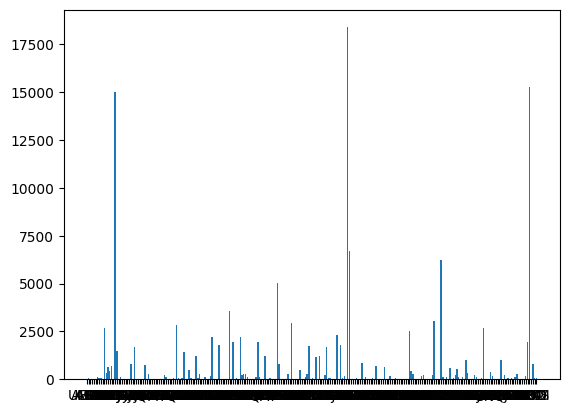

In [15]:
plt.bar(iso_dict.keys(), iso_dict.values())

In [16]:
iso_max_h = {}

for iso in db["ISO"].unique():
    iso_max_h[iso] = db[db["ISO"] == iso]["Height"].max()

<BarContainer object of 256 artists>

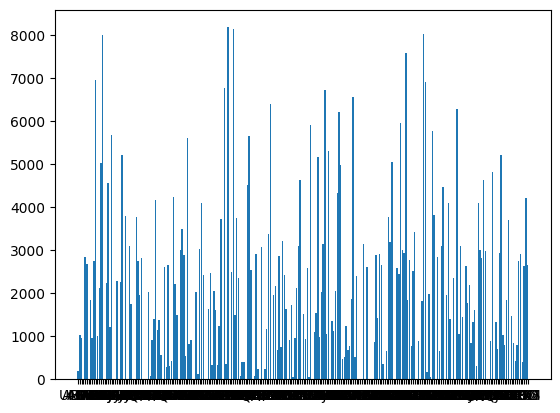

In [18]:
plt.bar(iso_max_h.keys(), iso_max_h.values())